In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv('StudentsPerformance.csv')

In [8]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
data.shape

(1000, 8)

In [10]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
num_cols  = [features for features in data.columns if data[features].dtype != 'O']
cat_cols  = [features for features in data.columns if data[features].dtype == 'O']

In [ ]:
data.head()

In [16]:
print("we have {} no of numerical features : {}".format(len(num_cols),num_cols))
print("we have {} no of categorical  features : {}".format(len(cat_cols),cat_cols))

we have 3 no of numerical features : ['math score', 'reading score', 'writing score']
we have 5 no of categorical  features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [17]:
data['total score(out of 300)'] = data['math score'] + data['reading score'] + data['writing score']
data['average score'] = data['total score(out of 300)']/3

In [18]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score(out of 300),average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
maths_full = data[data['math score'] == 100]['gender'].count()
print(maths_full)
reading_full = data[data['reading score'] == 100]['gender'].count()
print(reading_full)
writing_full = data[data['writing score'] == 100]['gender'].count()
print(writing_full)

7
17
14


In [20]:
reading_less_20 = data[data['reading score'] <= 20]['gender'].count()
print(reading_less_20)
maths_less_20 = data[data['math score'] <= 20]['gender'].count()
print(maths_less_20)
writing_less_20 = data[data['writing score'] <= 20]['gender'].count()
print(writing_less_20)

1
4
3


Text(0.5, 1.0, 'Seaborn KDE Plot')

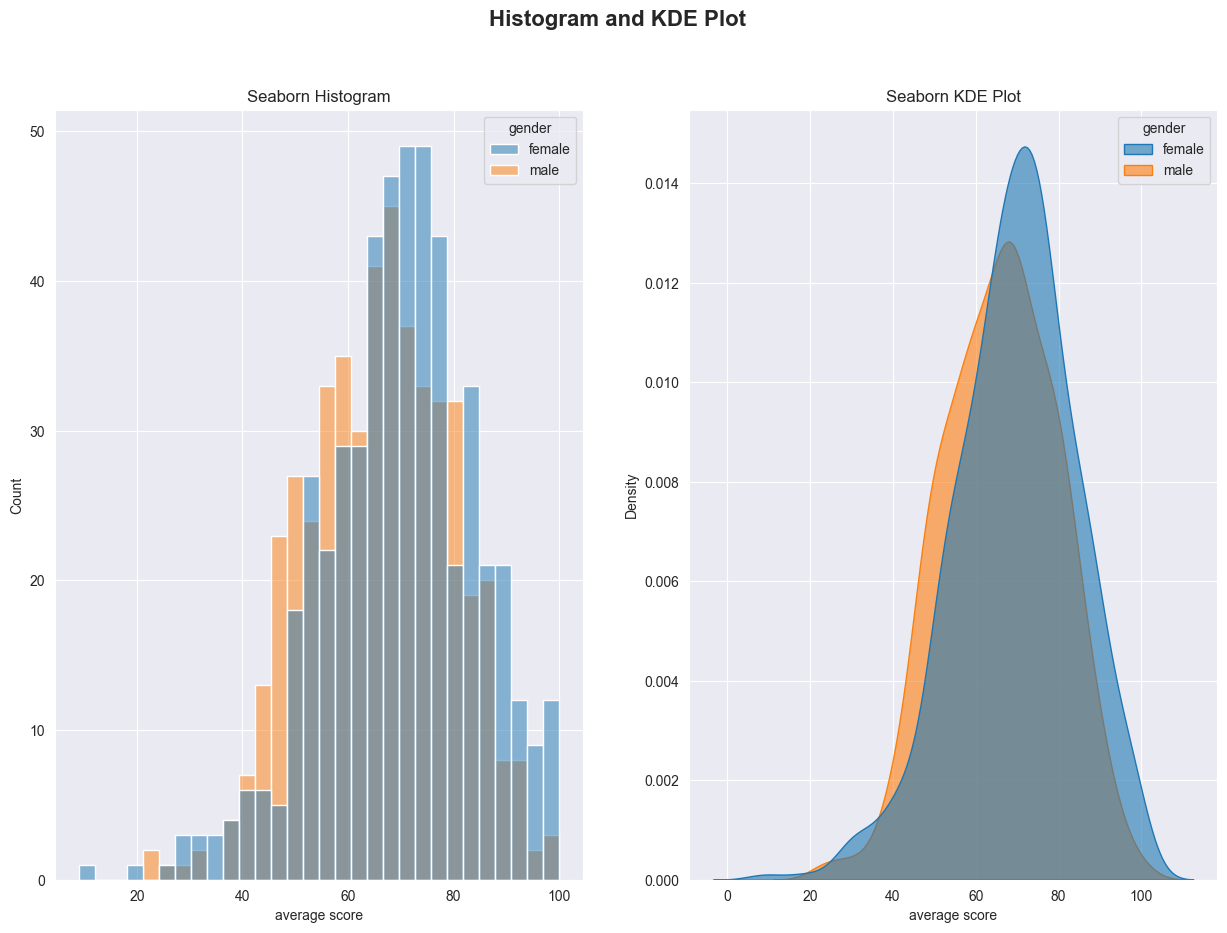

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle('Histogram and KDE Plot', fontsize=16, fontweight='bold')

# Plot 1: Simple histogram
sns.histplot(data,x='average score',hue='gender', bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Seaborn Histogram')

# Plot 2: Simple KDE
sns.kdeplot(data,x='average score',hue='gender' ,ax=axes[1], color='red', fill=True, alpha=0.6)
axes[1].set_title('Seaborn KDE Plot')

## female students peroform well as compared to male students


In [22]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score(out of 300),average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [23]:
data['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

### more female students are there as compared to male students

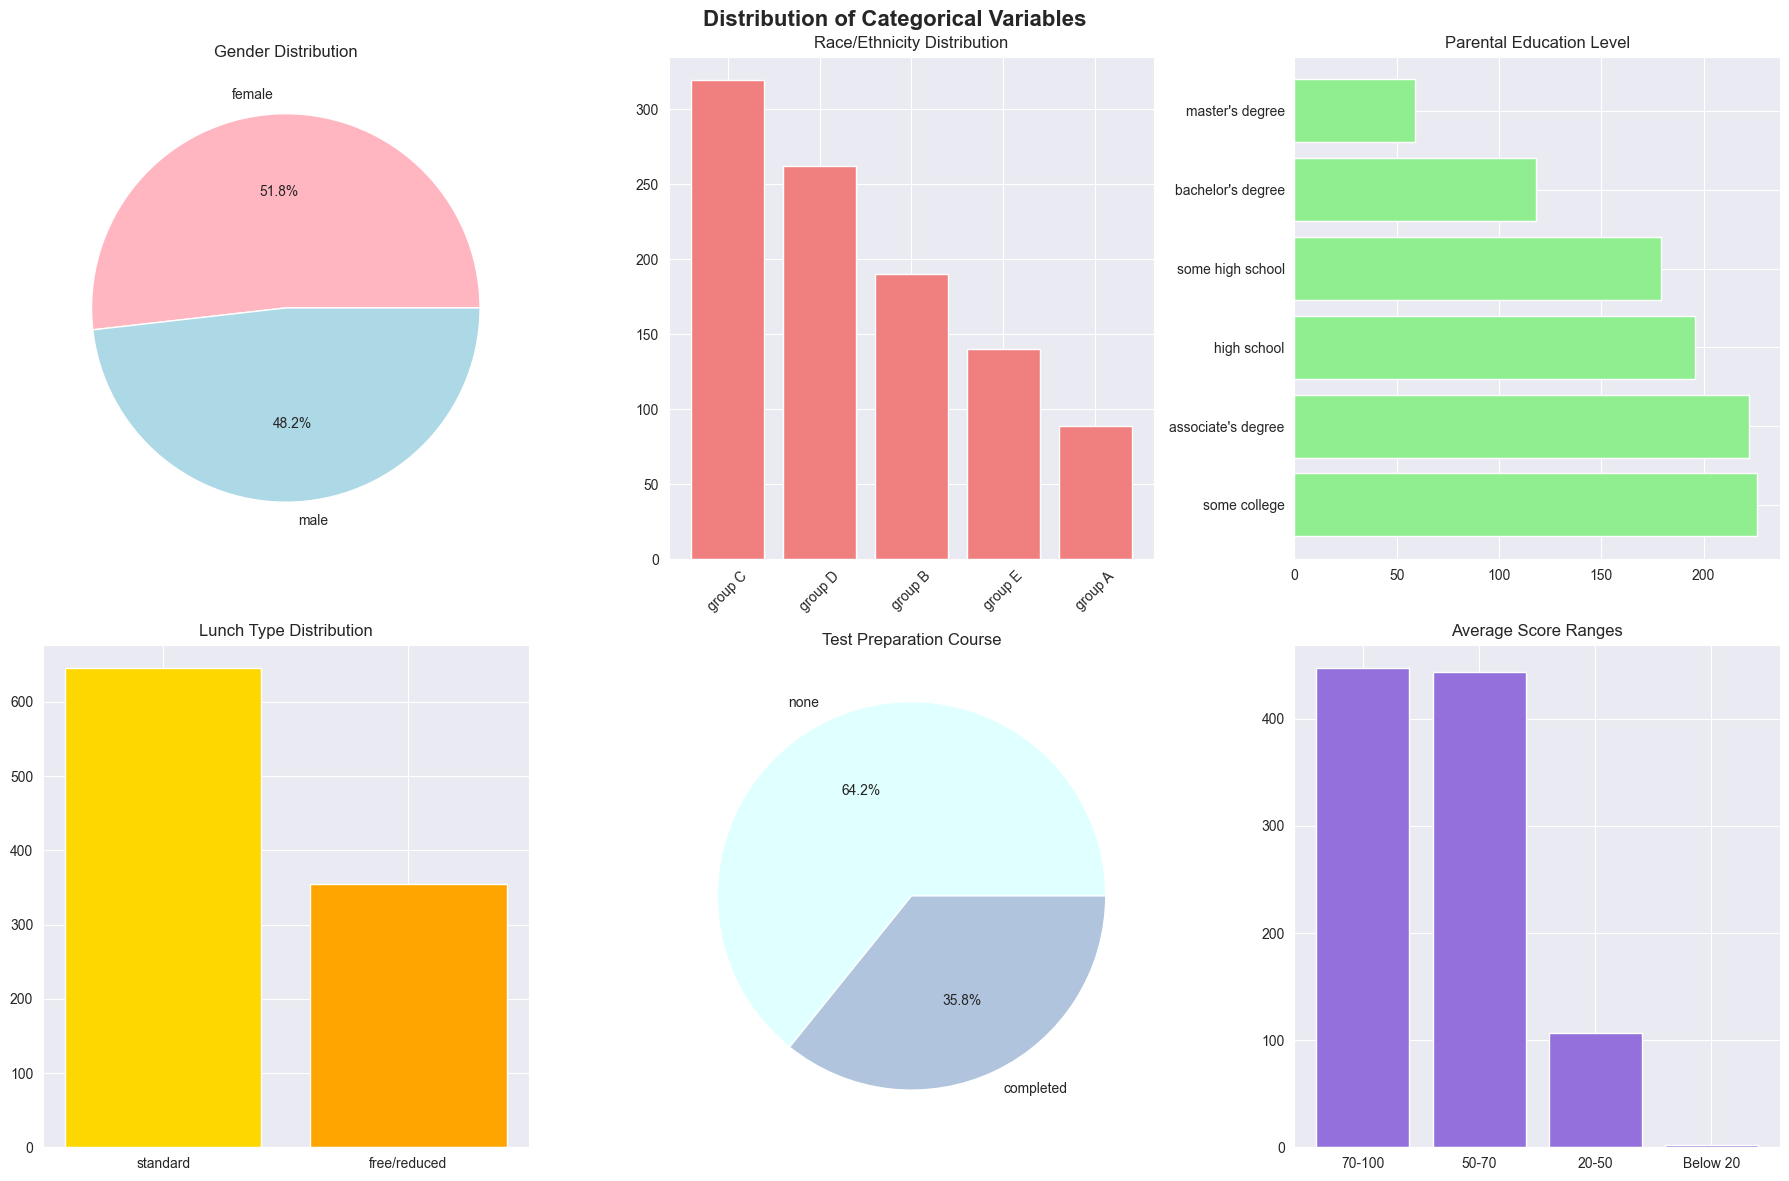

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution of Categorical Variables', fontsize=16, fontweight='bold')

# Gender distribution
gender_counts = data['gender'].value_counts()
axes[0, 0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightpink', 'lightblue'])
axes[0, 0].set_title('Gender Distribution')

# Race/Ethnicity distribution
race_counts = data['race/ethnicity'].value_counts()
axes[0, 1].bar(race_counts.index, race_counts.values, color='lightcoral')
axes[0, 1].set_title('Race/Ethnicity Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

# Parental education distribution
edu_counts = data['parental level of education'].value_counts()
axes[0, 2].barh(edu_counts.index, edu_counts.values, color='lightgreen')
axes[0, 2].set_title('Parental Education Level')

# Lunch type distribution
lunch_counts = data['lunch'].value_counts()
axes[1, 0].bar(lunch_counts.index, lunch_counts.values, color=['gold', 'orange'])
axes[1, 0].set_title('Lunch Type Distribution')

# Test preparation course
prep_counts = data['test preparation course'].value_counts()
axes[1, 1].pie(prep_counts.values, labels=prep_counts.index, autopct='%1.1f%%', colors=['lightcyan', 'lightsteelblue'])
axes[1, 1].set_title('Test Preparation Course')

scoring_range = pd.cut(data['average score'],bins=[0,20,50,70,100],labels=['Below 20','20-50','50-70','70-100'])
counts = scoring_range.value_counts()
axes[1, 2].bar(counts.index, counts.values, color='mediumpurple')
axes[1, 2].set_title('Average Score Ranges')

plt.tight_layout()
plt.show()

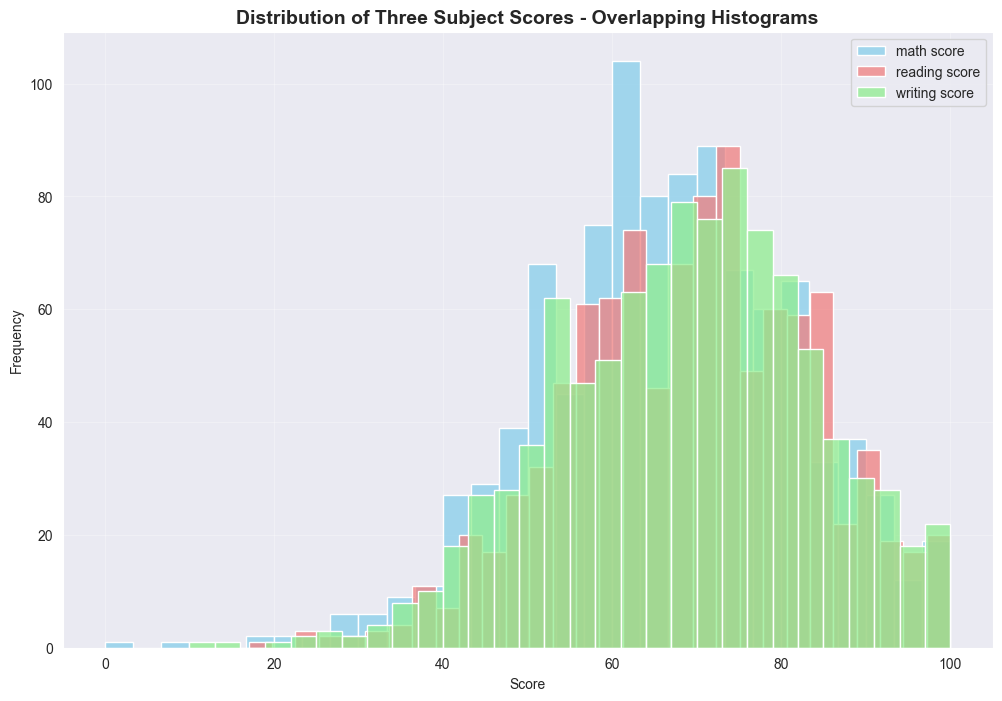

In [25]:
plt.figure(figsize=(12,8))
sns.histplot(data,x='math score', bins=30, color='skyblue',label='math score')
sns.histplot(data,x='reading score', bins=30, color='lightcoral',label='reading score')
sns.histplot(data,x='writing score', bins=30, color='lightgreen',label='writing score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Three Subject Scores - Overlapping Histograms', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



# Bivariant Analysis (Categorical vs Numerical plot)

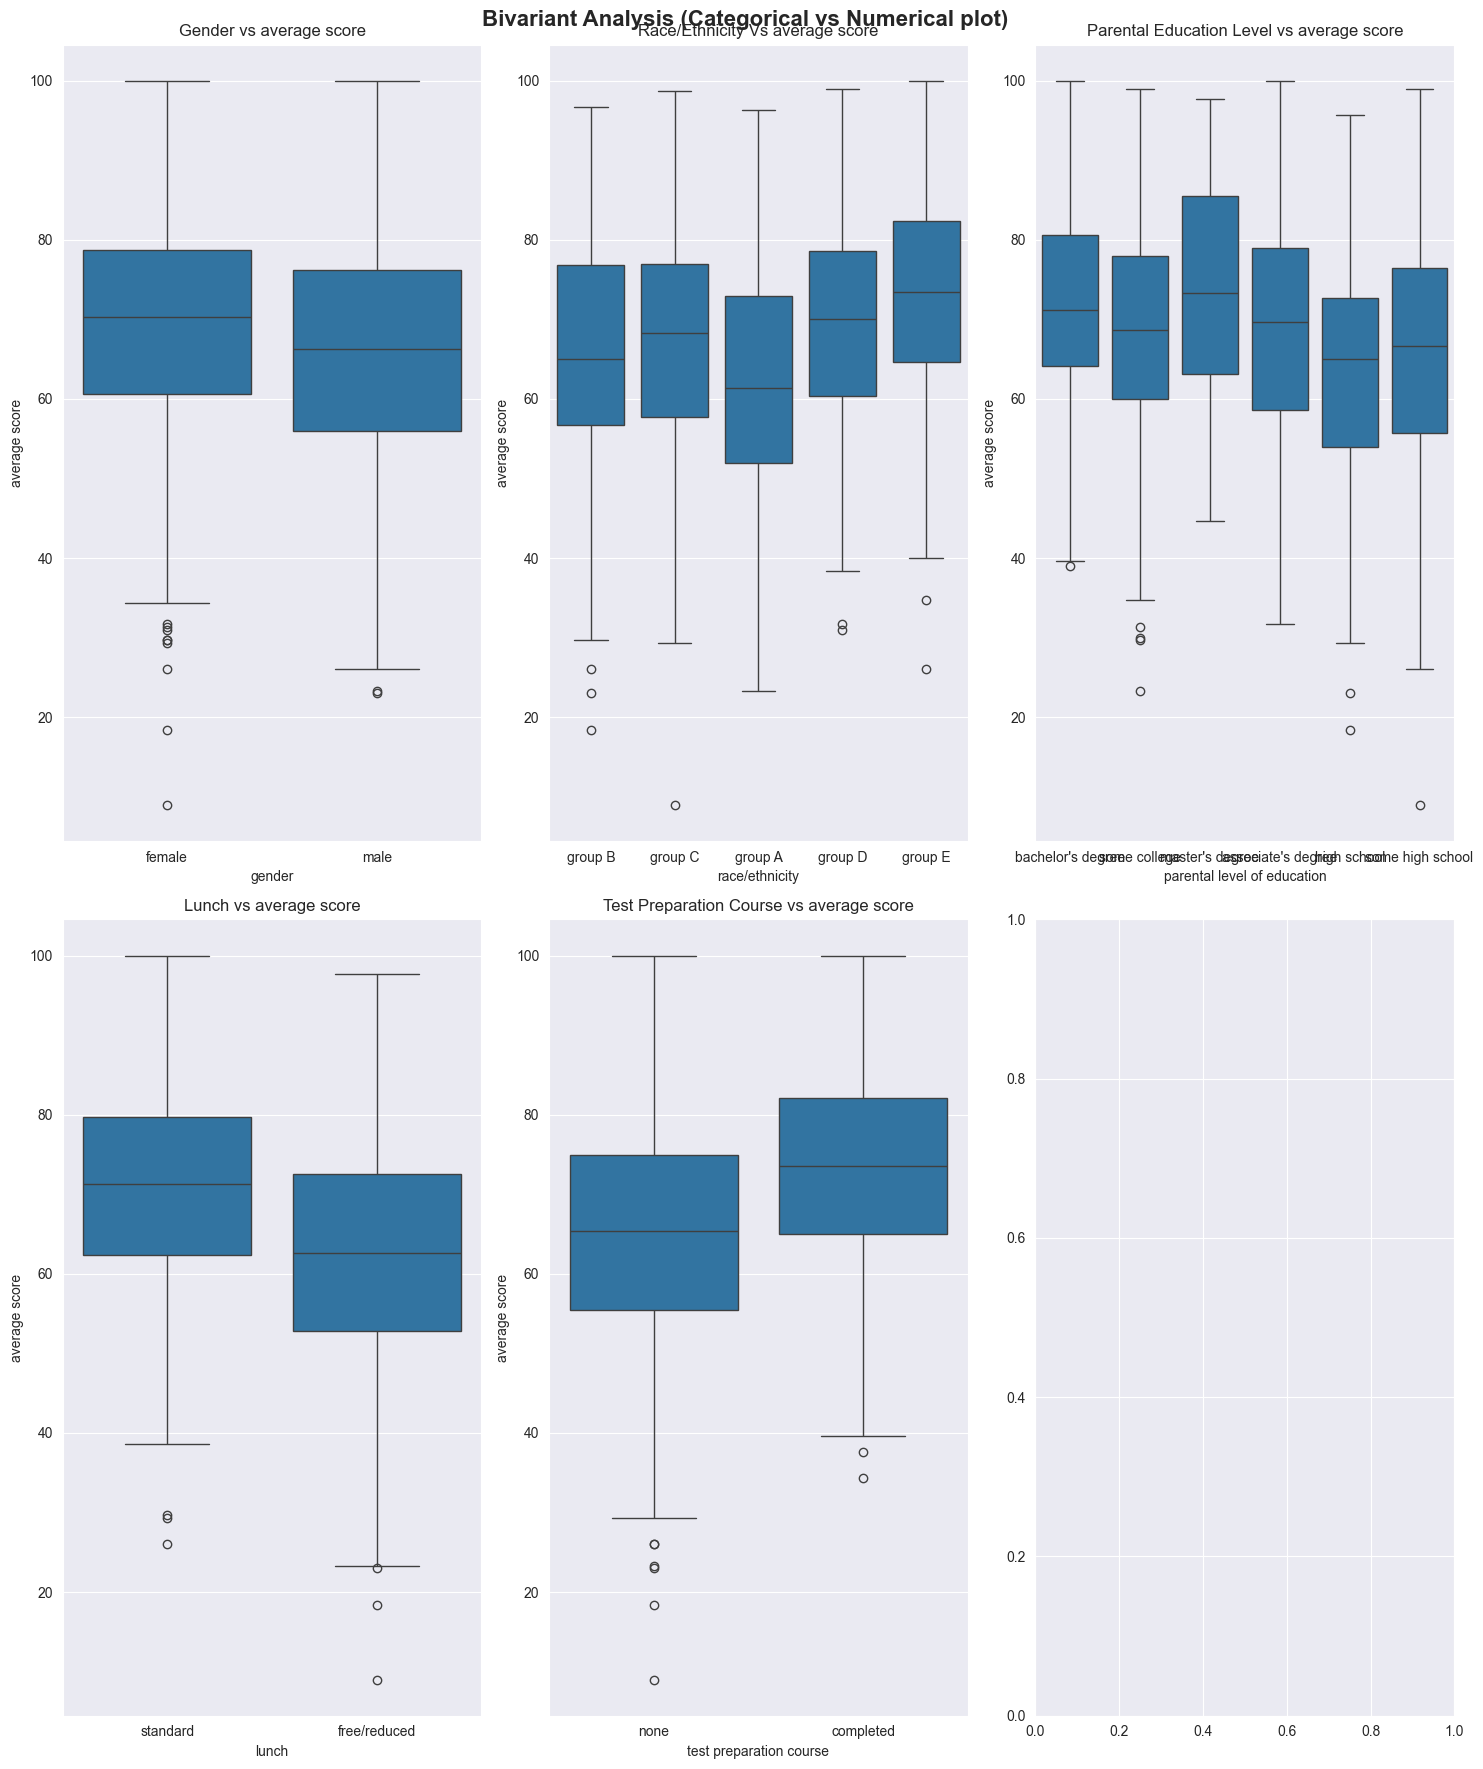

In [26]:


fig, axes = plt.subplots(2, 3, figsize=(15,18))
fig.suptitle('Bivariant Analysis (Categorical vs Numerical plot)', fontsize=16, fontweight='bold')

# Gender distribution
sns.boxplot(data=data,x='gender',y='average score',ax=axes[0, 0])
axes[0, 0].set_title('Gender vs average score')

# Race/Ethnicity distribution


sns.boxplot(data=data,x='race/ethnicity',y='average score',ax=axes[0, 1])
axes[0, 1].set_title('Race/Ethnicity Vs average score')

# Parental education distribution

sns.boxplot(data=data,x='parental level of education',y='average score',ax=axes[0, 2])
axes[0, 2].set_title('Parental Education Level vs average score')

# Lunch type distribution

sns.boxplot(data=data,x='lunch',y='average score',ax=axes[1, 0])
axes[1, 0].set_title('Lunch vs average score')

# Test preparation course

sns.boxplot(data=data,x='test preparation course',y='average score',ax=axes[1, 1])
axes[1, 1].set_title('Test Preparation Course vs average score')


plt.tight_layout()
plt.show()

## KdE plot of the 3 test scores


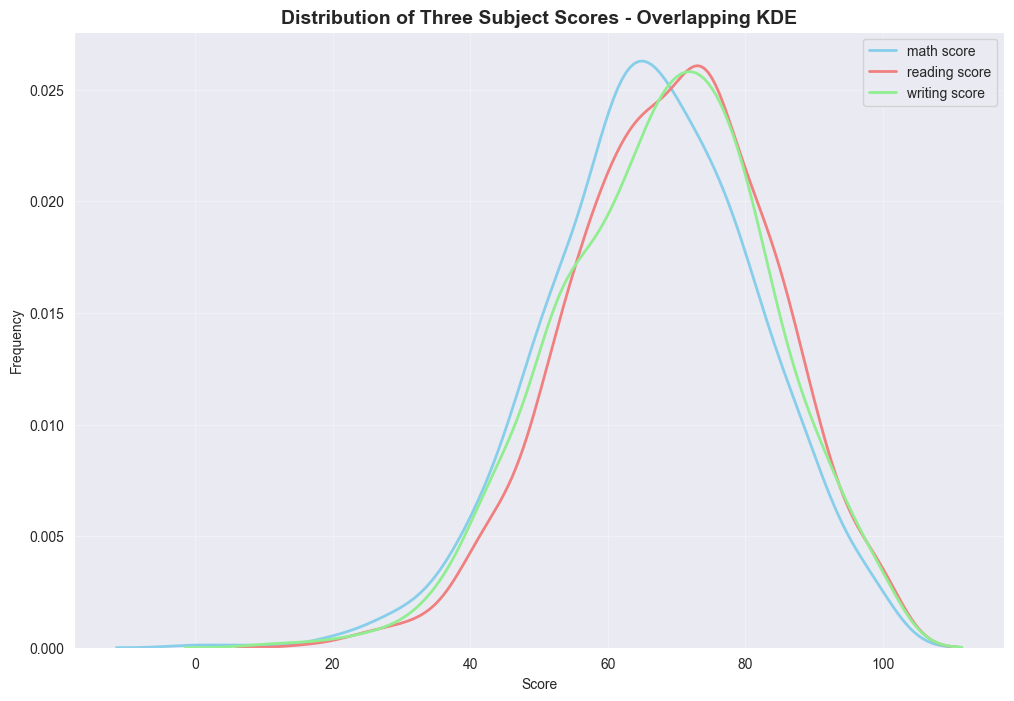

In [27]:
plt.figure(figsize=(12,8))
sns.kdeplot(data,x='math score', color='skyblue',label='math score',linewidth=2)
sns.kdeplot(data,x='reading score', color='lightcoral',label='reading score',linewidth=2)
sns.kdeplot(data,x='writing score', color='lightgreen',label='writing score',linewidth=2)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Three Subject Scores - Overlapping KDE', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



## Box plot of 3 given subjects

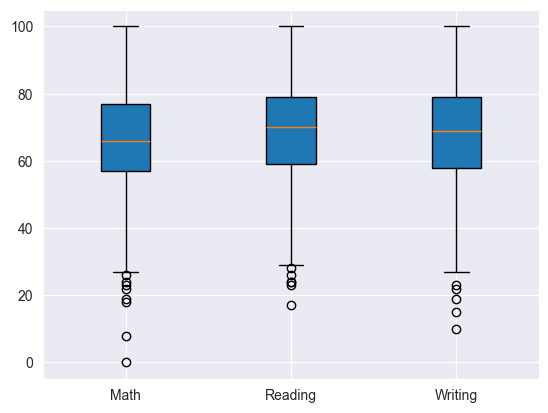

In [28]:
subject_data  = data[['math score','reading score', 'writing score']]
plt.boxplot([subject_data['math score'], subject_data['reading score'], subject_data['writing score']], 
            labels=['Math', 'Reading', 'Writing'],patch_artist = True)
plt.show()

### checking outliers in the given 3 numerical column 

In [29]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score(out of 300),average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


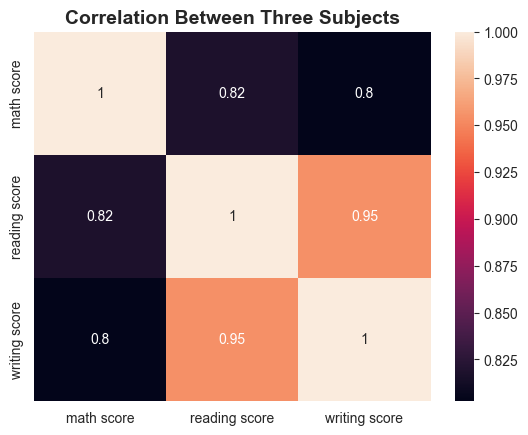

In [30]:
corr = data[['math score','reading score','writing score']].corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation Between Three Subjects', fontsize=14, fontweight='bold')
plt.show()